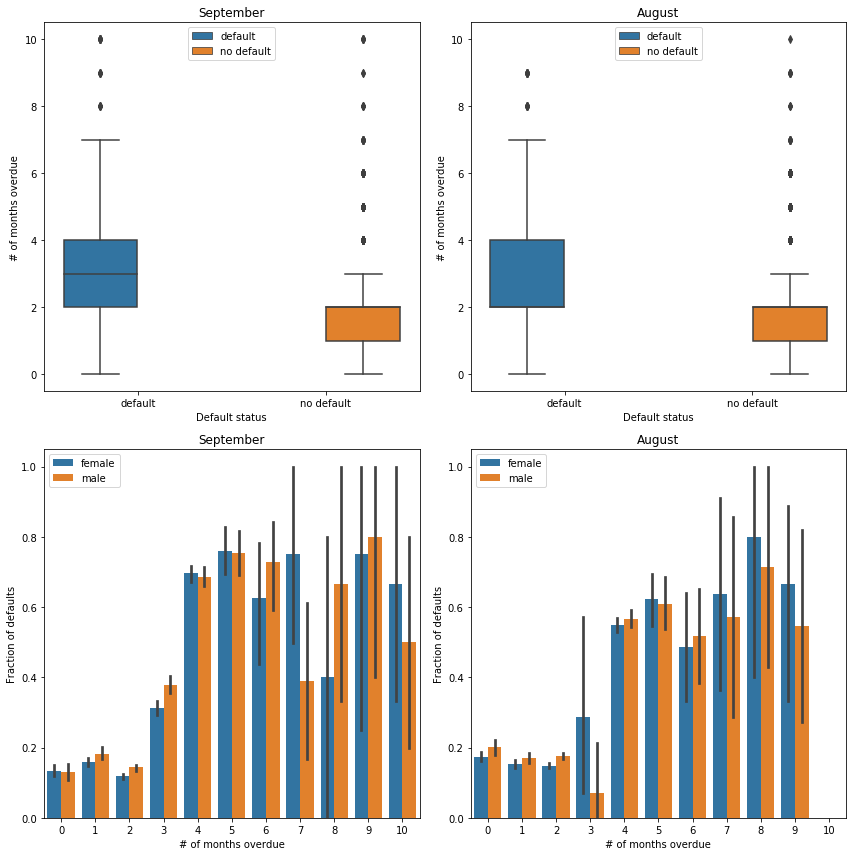

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

path = "cc_default.xls"

df = pd.read_excel(path, skip_rows=0, header=1)

df.rename(columns={'default payment next month': 'default'}, inplace=True)

df.columns = df.columns.str.lower()

df['sex'].replace({2: 'female', 1: 'male'}, inplace=True)

df['default_cat'] = df['default'].replace({1: 'default', 0: 'no default'}, \
                                             inplace=False)

df['pay_0'] = df['pay_0'] + 2

df['pay_2'] = df['pay_2'] + 2

df.corr().iloc[ : , -1]

width = 12
height = 12
plt.figure(figsize=(width, height))

plt.subplot(2, 2, 1)

ax_1 = sns.boxplot(x='default_cat', y='pay_0', data=df, hue='default_cat')

ax_1.set(xlabel='Default status', \
         ylabel='# of months overdue', \
         title="September")

ax_1.legend(loc='upper center')

plt.subplot(2, 2, 2)

ax_2 = sns.boxplot(x='default_cat', y='pay_2', data=df, hue='default_cat')

ax_2.set(xlabel='Default status', \
         ylabel='# of months overdue', \
         title="August")

ax_2.legend(loc='upper center')

plt.subplot(2, 2, 3)

ax_3 = sns.barplot(x='pay_0', y='default', data=df, hue='sex')

ax_3.set(xlabel='# of months overdue', ylabel='Fraction of defaults', \
       title="September")

ax_3.legend(loc='upper left')

plt.subplot(2, 2, 4)

ax_4 = sns.barplot(x='pay_2', y='default', data=df, hue='sex')

ax_4.set(xlabel='# of months overdue', ylabel='Fraction of defaults', \
       title="August")

ax_4.legend(loc='upper left')

plt.tight_layout()

plt.show()